<a href="https://colab.research.google.com/github/NavyaNaveen08/Navya_SOC/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

num_samples = 5000

np.random.seed(42)

data = {
    'fan_in': np.random.randint(1, 20, num_samples),
    'fan_out': np.random.randint(1, 20, num_samples),
    'num_gates': np.random.randint(10, 500, num_samples),
    'num_logic_levels': np.random.randint(1, 50, num_samples),
    'path_delay': np.random.uniform(0.1, 15.0, num_samples),
    'gate_delay_variation': np.random.uniform(0.05, 2.0, num_samples),
    'capacitance': np.random.uniform(0.001, 0.01, num_samples),
    'power_consumption': np.random.uniform(0.1, 5.0, num_samples),
    'signal_noise_ratio': np.random.uniform(20, 100, num_samples),
}

data['logic_depth'] = (
    0.5 * data['fan_in'] +
    0.3 * data['fan_out'] +
    0.7 * np.log1p(data['num_gates']) +
    0.6 * data['num_logic_levels'] +
    0.4 * np.sqrt(data['path_delay']) -
    0.2 * data['gate_delay_variation'] +
    0.1 * data['capacitance'] * 100 +
    0.3 * np.log1p(data['power_consumption']) +
    0.05 * np.random.randn(num_samples)
)

df = pd.DataFrame(data)

df.to_csv('rtl_timing_data.csv', index=False)

print("Complex dataset created successfully!")


Complex dataset created successfully!


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

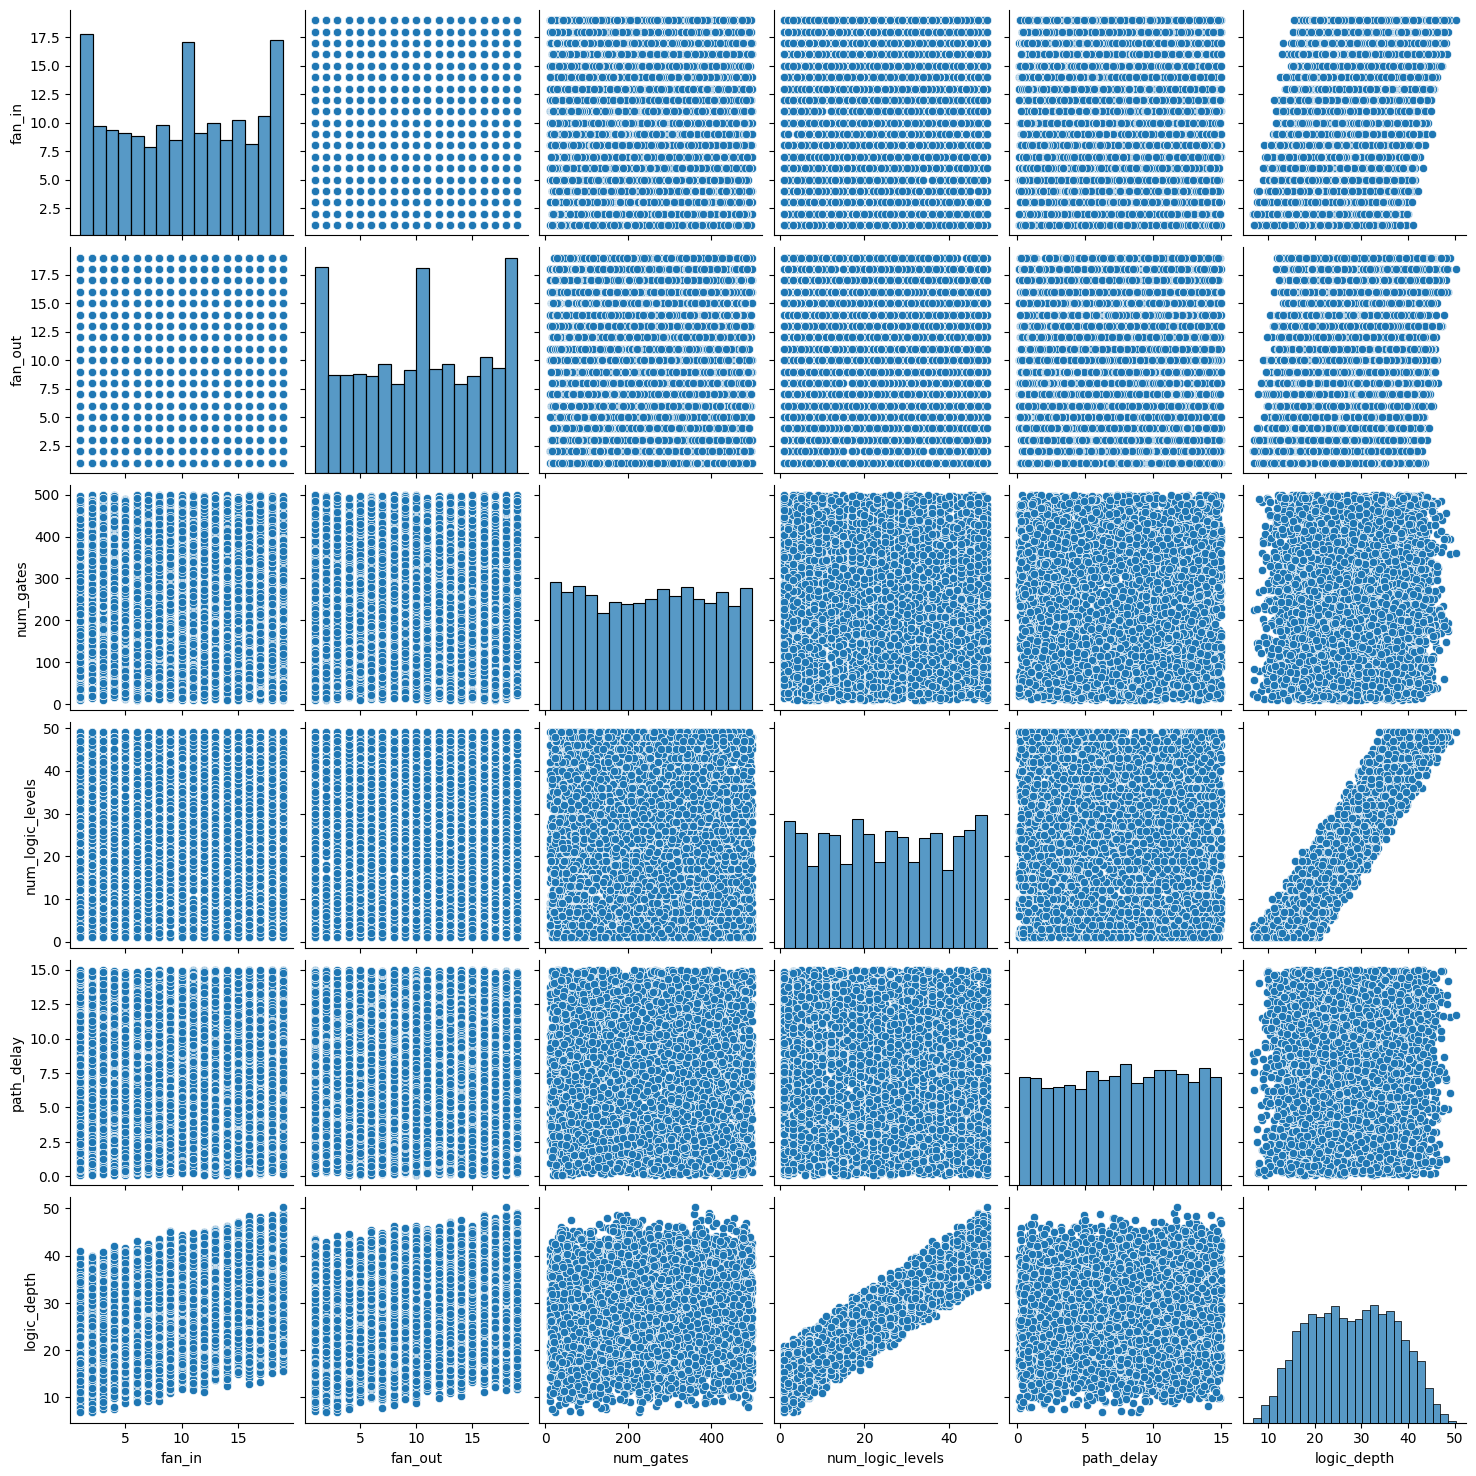

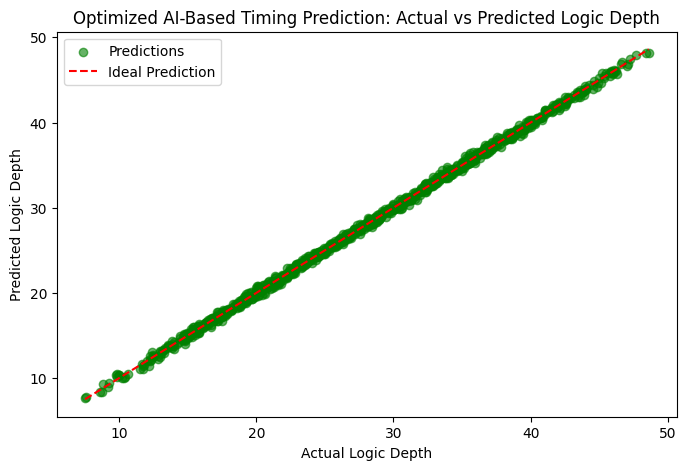

Model saved successfully at: /content/drive/My Drive/optimized_timing_prediction_model.pkl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import logging
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

df = pd.read_csv('rtl_timing_data.csv')
logging.info("Dataset loaded successfully")

features = ['fan_in', 'fan_out', 'num_gates', 'num_logic_levels', 'path_delay']
X = df[features]
y = df['logic_depth']

sns.pairplot(df[features + ['logic_depth']], palette='husl')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logging.info("Data split into training and testing sets")

models = {
    'GradientBoosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR()
}

best_model = None
best_score = float('-inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    logging.info(f"{name} Model Score: {score}")
    if score > best_score:
        best_score = score
        best_model = model

logging.info(f"Best Model Selected: {best_model}")

param_space = {
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10)
}
opt = BayesSearchCV(GradientBoostingRegressor(), param_space, n_iter=32, cv=5, random_state=42, n_jobs=-1)
opt.fit(X_train, y_train)
logging.info("Model trained with optimized hyperparameters")

model = opt.best_estimator_
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

logging.info(f"Model Performance: MAE={mae}, MSE={mse}, RMSE={rmse}, R2 Score={r2}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Ideal Prediction')
plt.xlabel("Actual Logic Depth")
plt.ylabel("Predicted Logic Depth")
plt.legend()
plt.title("Optimized AI-Based Timing Prediction: Actual vs Predicted Logic Depth")
plt.show()

joblib.dump(model, 'optimized_timing_prediction_model.pkl')
logging.info("Optimized model saved successfully")

import joblib

local_model_path = "optimized_timing_prediction_model.pkl"
joblib.dump(model, local_model_path)

drive_model_path = "/content/drive/My Drive/optimized_timing_prediction_model.pkl"
joblib.dump(model, drive_model_path)

print(f"Model saved successfully at: {drive_model_path}")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(model)

NameError: name 'model' is not defined

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.8 MB/s eta 0:00:00
